In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 1. Importing our data to jupyter notebook

In [43]:
data = pd.read_csv('game.csv') 
print("Dataset Shape: ", data.shape)

data.head(10)

/Users/robertofabian/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset Shape:  (171907, 161)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
5,18710511,0,Thu,CH1,na,2,CL1,na,4,18,...,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,NaN,Y
6,18710513,0,Sat,WS3,na,2,CL1,na,5,12,...,Ezra Sutton,5.0,white104,Elmer White,9.0,bassj101,John Bass,6.0,NaN,Y
7,18710513,0,Sat,CH1,na,3,FW1,na,2,14,...,Ed Mincher,7.0,donnp101,Pete Donnelly,8.0,kellb105,Bill Kelly,9.0,NaN,Y
8,18710515,0,Mon,WS3,na,3,FW1,na,3,6,...,Ed Mincher,7.0,donnp101,Pete Donnelly,9.0,kellb105,Bill Kelly,8.0,NaN,Y
9,18710516,0,Tue,TRO,na,2,BS1,na,3,29,...,Fred Cone,7.0,spala101,Al Spalding,1.0,jacks101,Sam Jackson,8.0,HTBF,Y


In [44]:
data.drop(data.iloc[:,29:200], inplace = True, axis = 1)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               171907 non-null  int64  
 1   number_of_game     171907 non-null  int64  
 2   day_of_week        171907 non-null  object 
 3   v_name             171907 non-null  object 
 4   v_league           171907 non-null  object 
 5   v_game_number      171907 non-null  int64  
 6   h_name             171907 non-null  object 
 7   h_league           171907 non-null  object 
 8   h_game_number      171907 non-null  int64  
 9   v_score            171907 non-null  int64  
 10  h_score            171907 non-null  int64  
 11  length_outs        140841 non-null  float64
 12  day_night          140150 non-null  object 
 13  completion         116 non-null     object 
 14  forefeit           145 non-null     object 
 15  protest            180 non-null     object 
 16  pa

# 2. Eliminating columns that are not useful 

In [46]:
res = data.drop(['date','number_of_game','day_of_week','v_name','v_league','v_game_number','h_name',
          'h_league','h_game_number','h_name','h_league','h_game_number',
          'length_outs','day_night','completion','forefeit','protest','park_id','attendance',
          'length_minutes','v_line_score','h_line_score'],axis=1)

In [47]:
res

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
171902,6,4,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0
171903,2,5,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0
171904,1,7,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
171905,4,10,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0


In [48]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   v_score            171907 non-null  int64  
 1   h_score            171907 non-null  int64  
 2   v_at_bats          140838 non-null  float64
 3   v_hits             140838 non-null  float64
 4   v_doubles          140838 non-null  float64
 5   v_triples          140838 non-null  float64
 6   v_homeruns         140838 non-null  float64
 7   v_rbi              140838 non-null  float64
 8   v_sacrifice_hits   140838 non-null  float64
 9   v_sacrifice_flies  140838 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 13.1 MB


In [49]:
res.head(10)

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0
5,18,10,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0
6,12,8,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0
7,14,5,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0
8,6,12,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0
9,29,14,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0


In [50]:
res.isnull().sum()

v_score                  0
h_score                  0
v_at_bats            31069
v_hits               31069
v_doubles            31069
v_triples            31069
v_homeruns           31069
v_rbi                31069
v_sacrifice_hits     31069
v_sacrifice_flies    31069
dtype: int64

# 3. We created another column called res to represent the winning team (note: its not yet converted to binary)

In [51]:
res['Winner'] = res['h_score'] - res['v_score']

In [52]:
res

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,-2
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,-8
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,2
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,-4
...,...,...,...,...,...,...,...,...,...,...,...
171902,6,4,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,-2
171903,2,5,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,3
171904,1,7,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6
171905,4,10,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0,6


# 4. Our target is the Winner while our features are v_at_bats,	v_hits,	v_doubles,	v_triples,	v_homeruns,	v_rbi,	v_sacrifice_hits, and	v_sacrifice_flies. Now we graph each feature versus the target to find pattern in the data.	

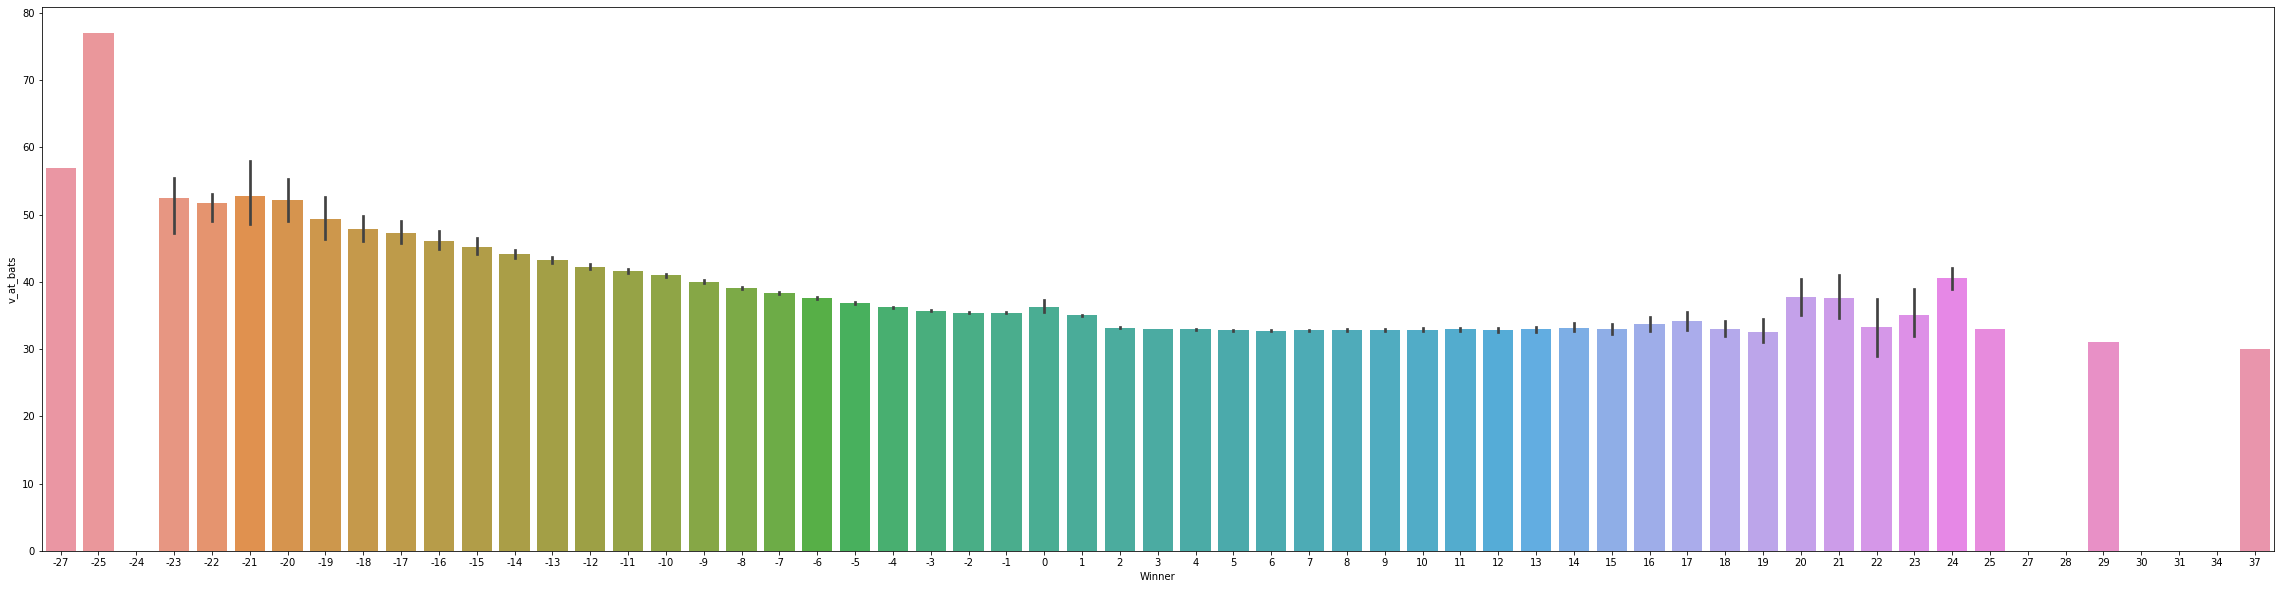

In [53]:
# v_at_bats vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_at_bats', data = res)

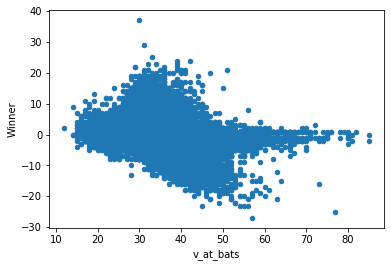

In [54]:
res.plot.scatter(x = 'v_at_bats', y = 'Winner')

# The barplot shows a downward trend while the scatter plot shows no trend.

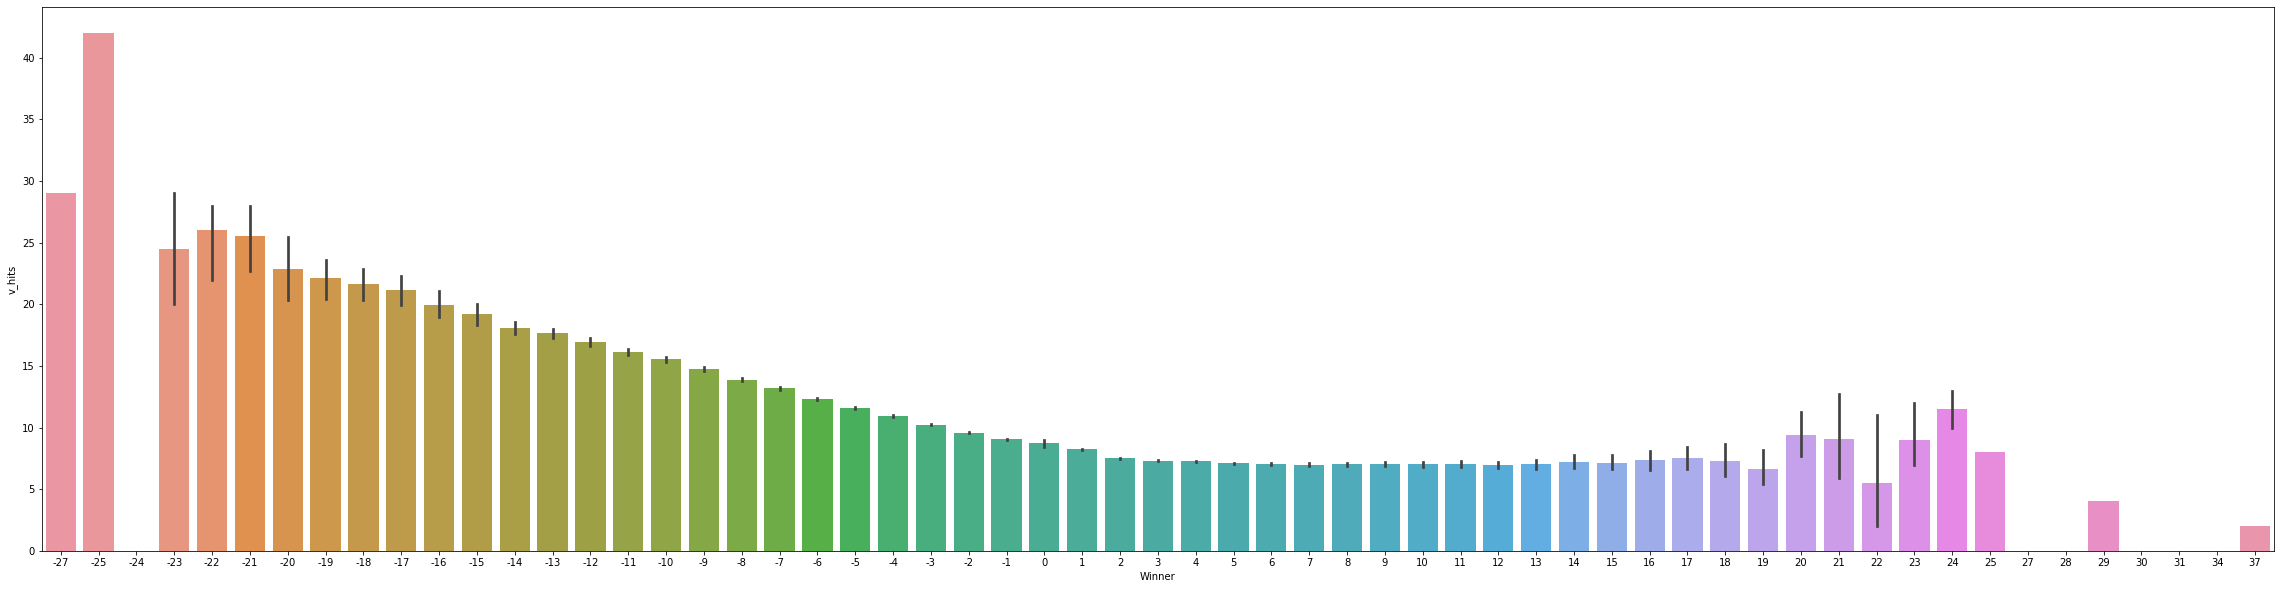

In [55]:
# v_hits vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_hits', data = res)

# The barplot shows a downward trend.

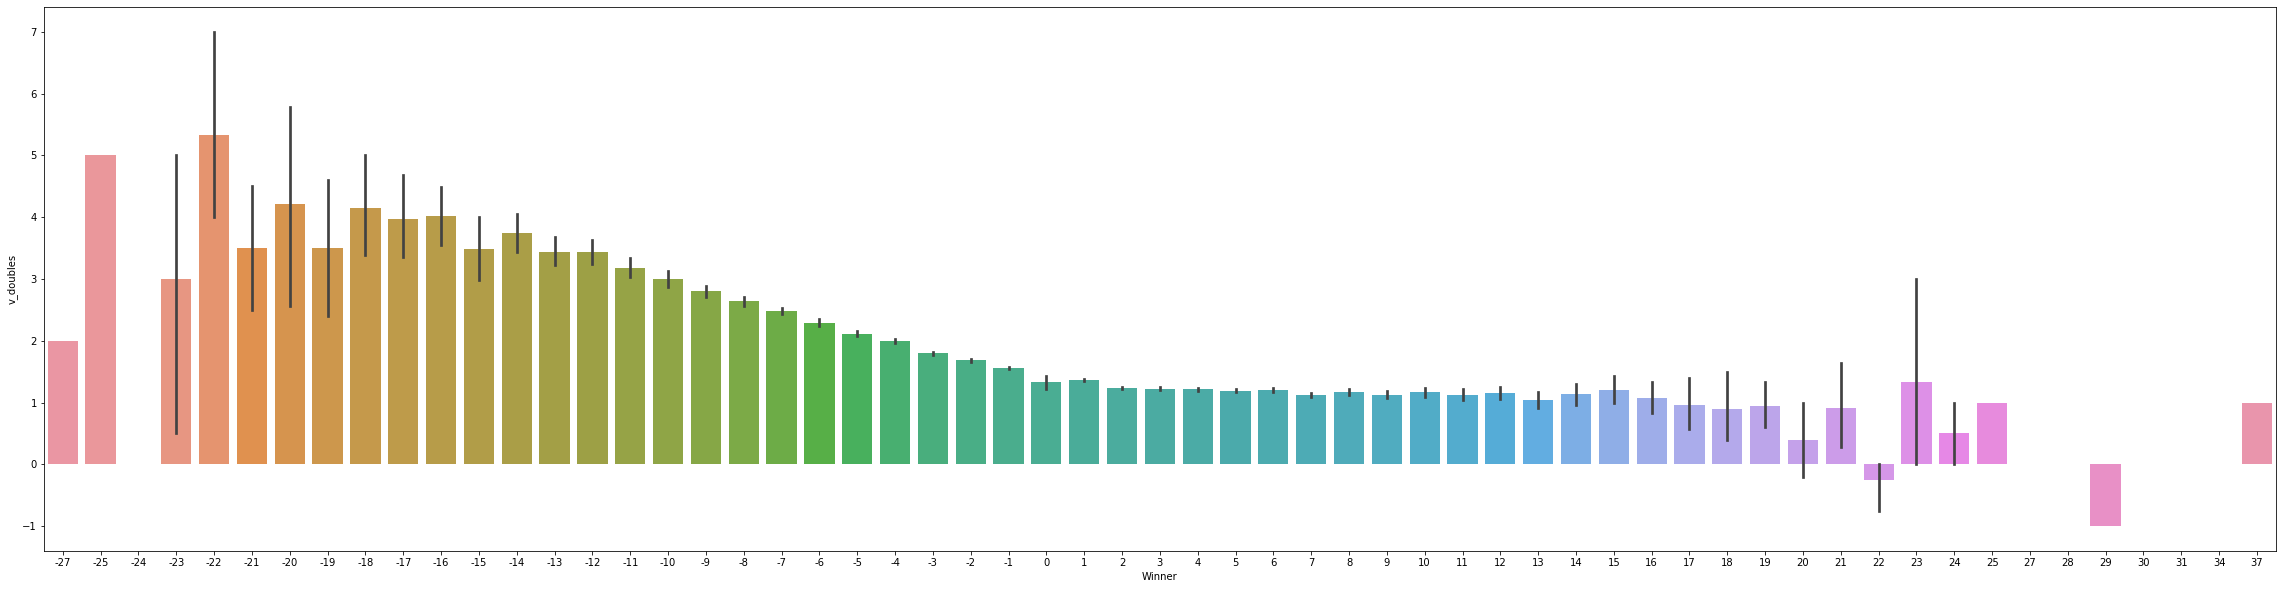

In [17]:
# v_doubles vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_doubles', data = res)

# The barplot shows a downward trend.

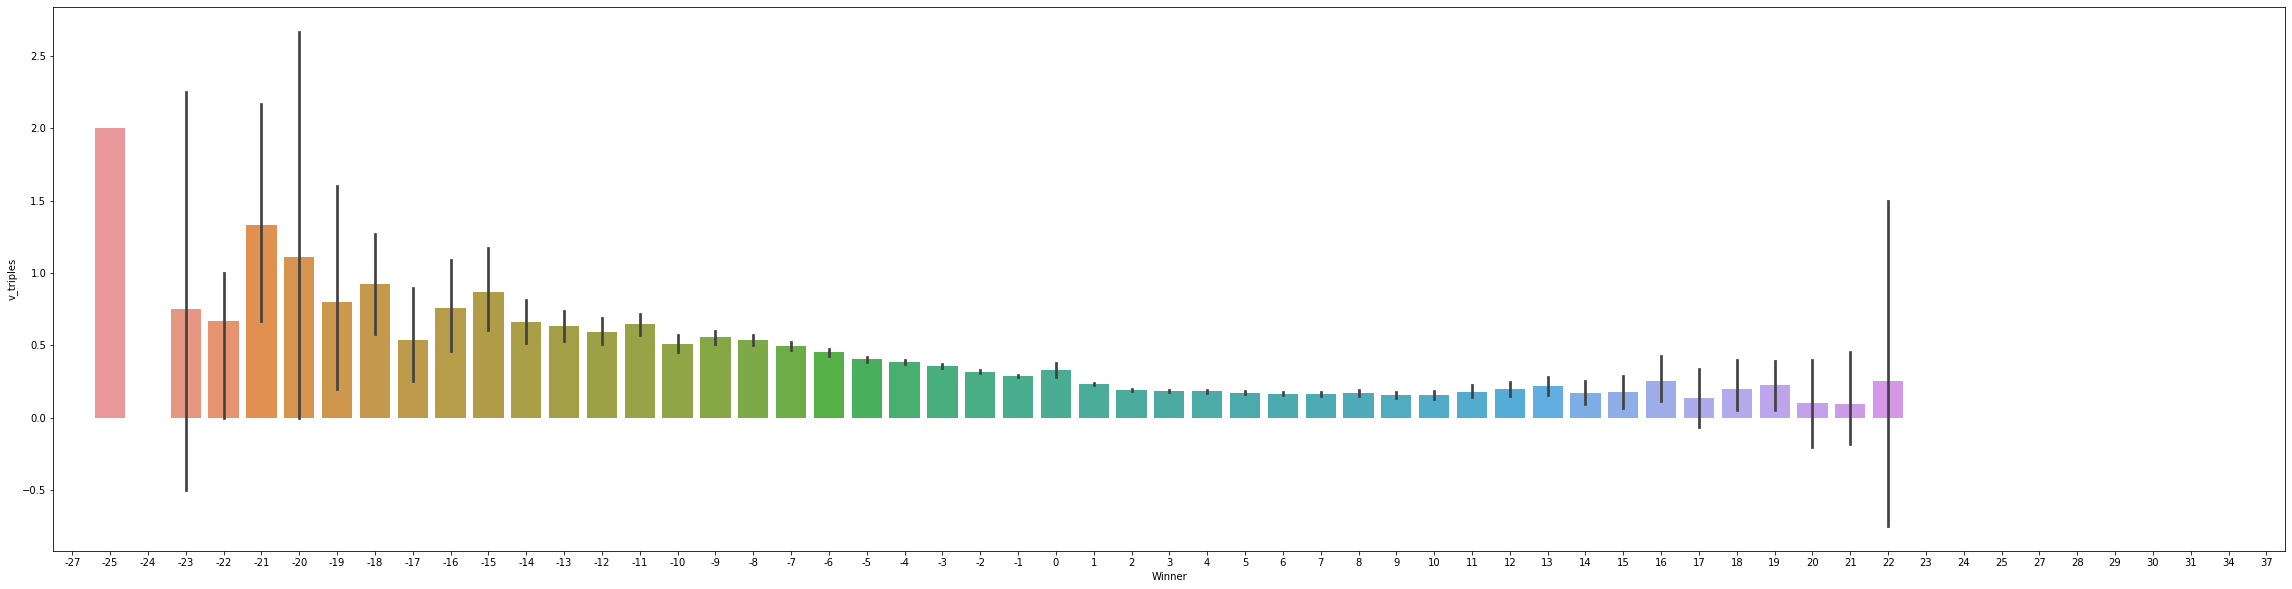

In [56]:
# v_triples vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_triples', data = res)

# The barplot shows a downward trend.

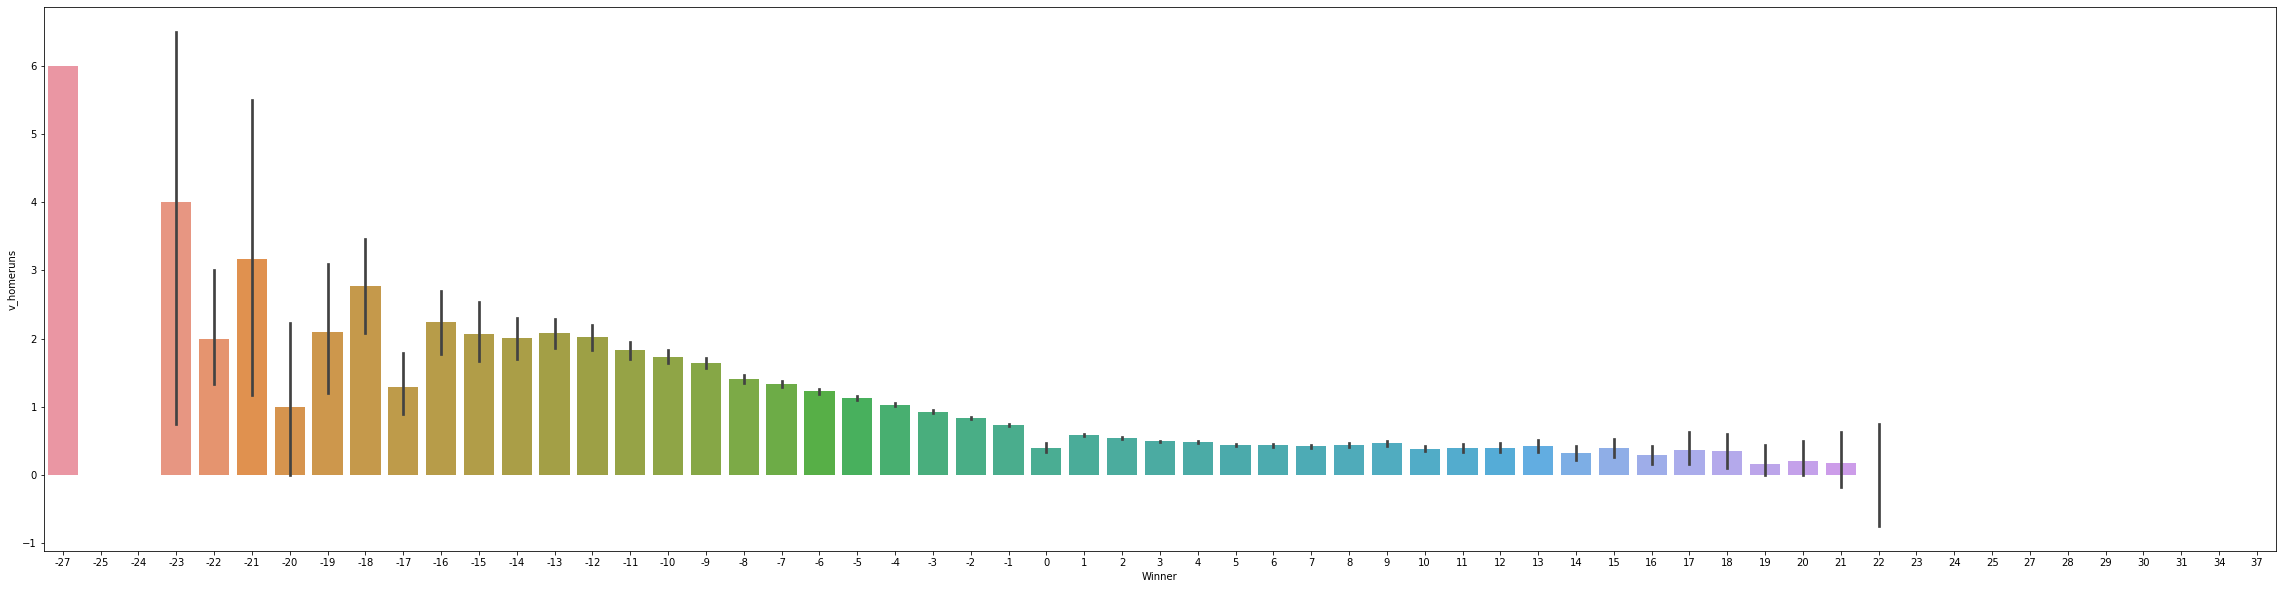

In [57]:
# v_homeruns vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_homeruns', data = res)

# The barplot shows a downward trend.

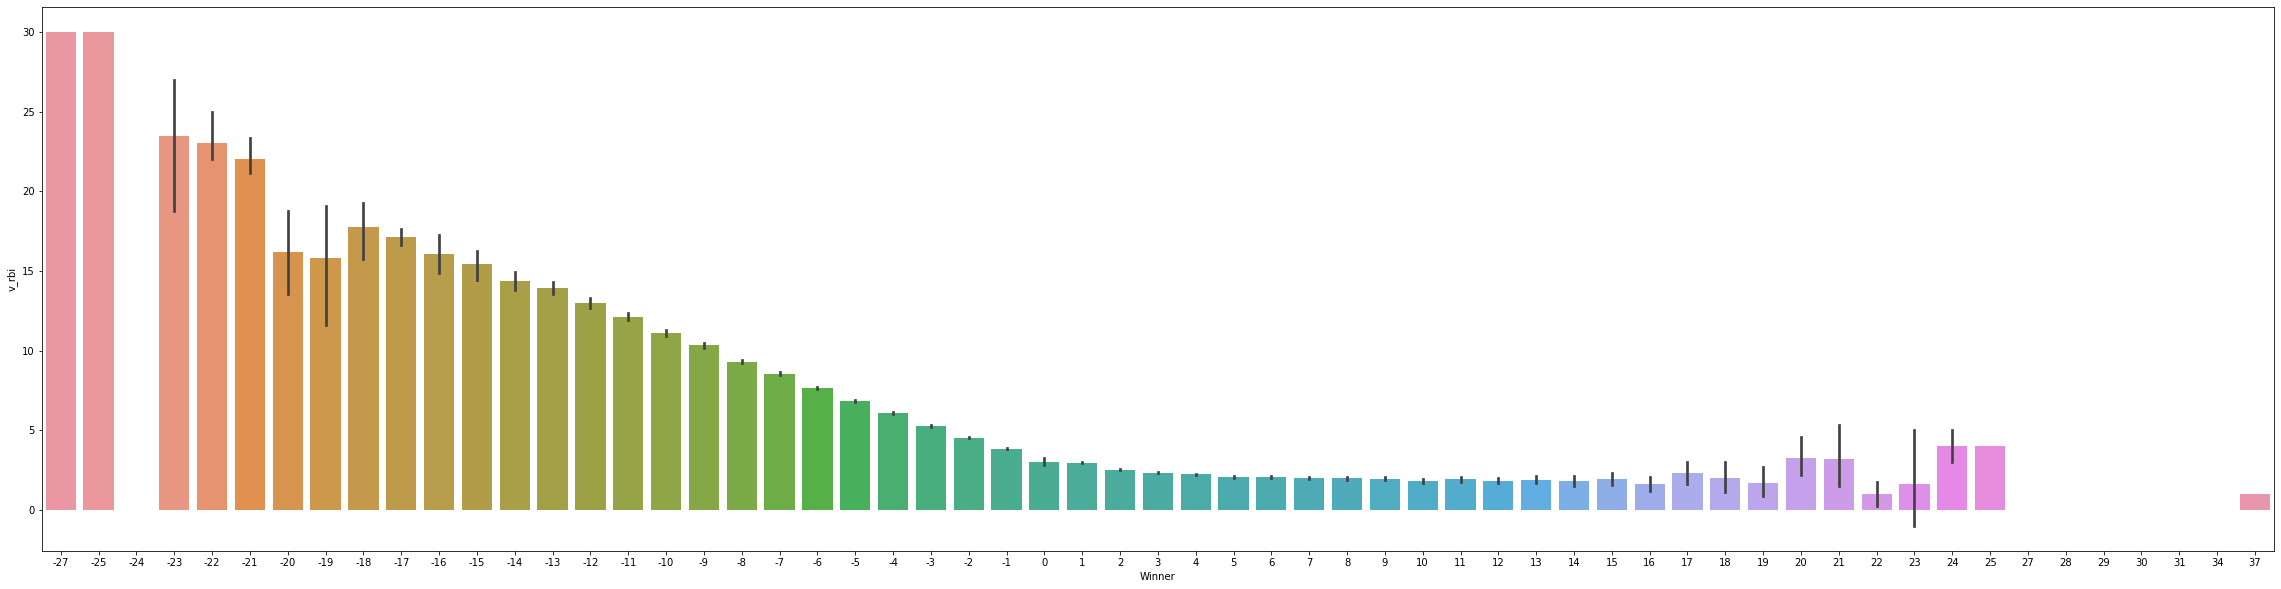

In [58]:
# v_rbi vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_rbi', data = res)

# The barplot shows a downward trend.

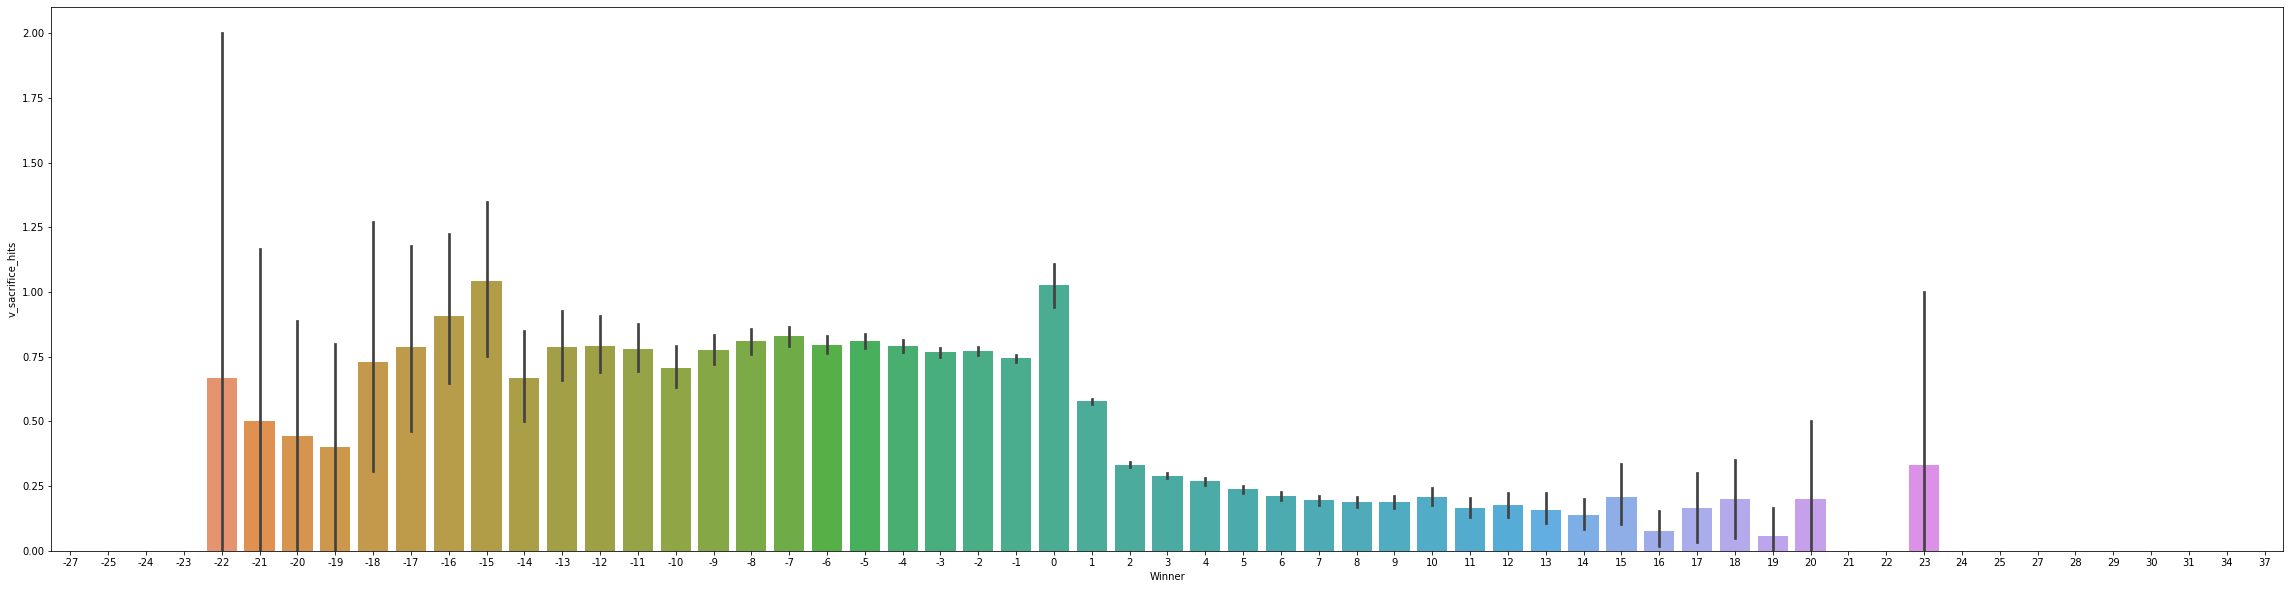

In [59]:
# v_sacrifice_hits vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_sacrifice_hits', data = res)

# The barplot shows no trend.

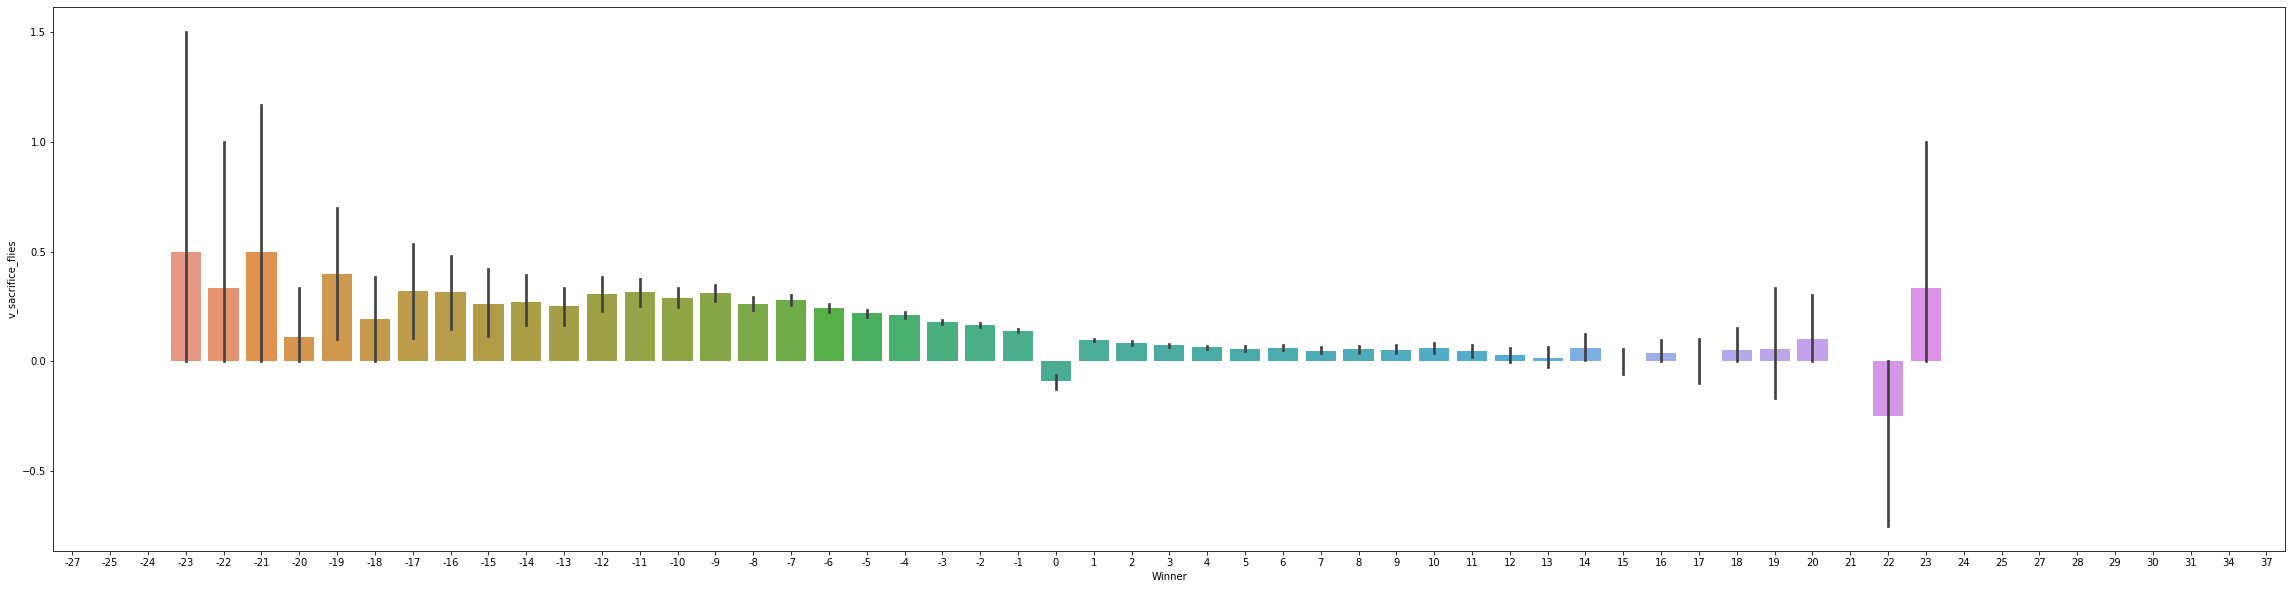

In [60]:
# v_sacrifice_flies vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_sacrifice_flies', data = res)

# The barplot shows a downward trend.

# 5. Now we are going to convert the target to binary numbers: 1 represents a win and 0 represents a loss.

In [61]:
res['Winner'] = res['Winner'].apply(lambda x: 1 if x > 0 else 0)
res.head(20)

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0
5,18,10,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0,0
6,12,8,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0,0
7,14,5,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0,0
8,6,12,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0,1
9,29,14,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0,0


1    93587
0    78320
Name: Winner, dtype: int64


/Users/robertofabian/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


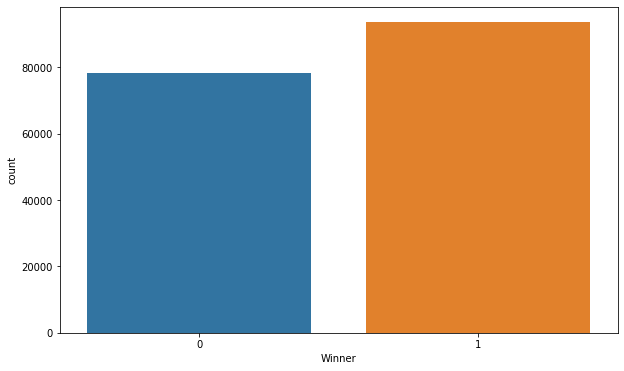

In [62]:
print(res['Winner'].value_counts())

fig = plt.figure(figsize=(10,6))
sns.countplot(res['Winner'])

# Removing the first two columns, we do not really need them. Here we obtained our final data with the features as our independent variables and the target (Winner) as the dependent variable.

In [63]:
Data_Final = res.drop(['v_score','h_score'],axis=1)

In [64]:
Data_Final.head()

,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0


In [65]:
Data_Final.mean()

v_at_bats            34.914398
v_hits                8.999318
v_doubles             1.562391
v_triples             0.276012
v_homeruns            0.728653
v_rbi                 3.993042
v_sacrifice_hits      0.558741
v_sacrifice_flies     0.128609
Winner                0.544405
dtype: float64

# 6. Separating the dependent (target) and independent (features) variables

In [66]:
X = Data_Final.iloc[:, :-1].values
y = Data_Final.iloc[:,-1].values

In [67]:
X

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [68]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
# Separating into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("X- train Shape: ", X_train.shape)
print("X- test Shape: ", X_test.shape)
print("y- train Shape: ", y_train.shape)
print("y- test Shape: ", y_test.shape)

X- train Shape:  (137525, 8)
X- test Shape:  (34382, 8)
y- train Shape:  (137525,)
y- test Shape:  (34382,)


# 7. Implement standard scaling to scale the values in the dataset in the same scale

In [34]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 8.  Apply different machine learnin algorithms

In [35]:
# Random Forest Classifier

rf_regressor = RandomForestClassifier(n_estimators=100)

# Fitting the training data on the classifier
rf_regressor.fit(X_train,y_train)

# Predicting the test data using the classifier
y_pred = rf_regressor.predict(X_test)

[[ 9034  6796]
 [ 3675 14877]]


<Figure size 720x432 with 0 Axes>

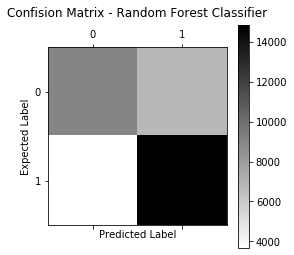

In [36]:
# Apply confusion matrix to the random forest classifier
cm = confusion_matrix(y_test,y_pred)

print(cm)

# Plot of the confusion matrix
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confision Matrix - Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [37]:
print("Total Predictions : ", len(y_pred))
print("Correct Prediction : ", sum(y_pred==y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred==y_test)*100 / len(y_pred),"%")

Total Predictions :  34382
Correct Prediction :  23911
Incorrect Prediction :  10471
Accuracy :  69.54511081379792 %


In [38]:
# Support Vector Classifier (SVC)
svc_regressor = SVC()

svc_regressor.fit(X_train,y_train)

y_pred = svc_regressor.predict(X_test)

[[ 9258  6572]
 [ 3111 15441]]


<Figure size 720x432 with 0 Axes>

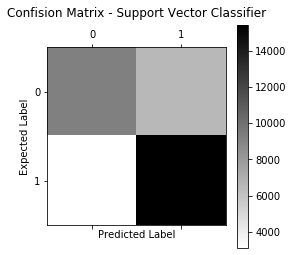

In [39]:
# Apply confusion matrix to the random forest classifier
cm = confusion_matrix(y_test,y_pred)

print(cm)

# Plot of the confusion matrix
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confision Matrix - Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [40]:
print("Total Predictions : ", len(y_pred))
print("Correct Prediction : ", sum(y_pred==y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred==y_test)*100 / len(y_pred),"%")

Total Predictions :  34382
Correct Prediction :  24699
Incorrect Prediction :  9683
Accuracy :  71.83700773660637 %


# Remarks: This is not yet done. I will continue working on this. Please let me know if you have any suggestions.  